In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
CNN_score = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/Spiculation/CNN_Spic_max_scores_kmeans.csv")
display(CNN_score)

,InstanceID,Score,Agreement,Spiculation,Size,Two_Agreement
0,4,0.876645,Low Radiologist Agreement,2,1094,Low_No
1,118,0.938690,All Radiologists Agree,0,246,Full_High
2,134,0.884858,Low Radiologist Agreement,2,931,Low_No
3,143,0.326836,Low Radiologist Agreement,2,161,Low_No
4,175,0.304596,All Radiologists Agree,0,71,Full_High
...,...,...,...,...,...,...
1327,40771,0.354983,High Radiologist Agreement,0,73,Full_High
1328,40780,0.902747,Low Radiologist Agreement,2,638,Low_No
1329,40794,0.953541,No Radiologist Agreement,2,437,Low_No
1330,40801,0.899225,No Radiologist Agreement,2,657,Low_No


In [8]:
test_score = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/Spiculation/test_2class.csv")

In [9]:
display(test_score)

,Unnamed: 0,noduleID,InstanceID,Dataset,Binary Rating,Bin_Rating,Binary_Rating_name,Agreement,Agreement_name,Two_Agreement,Two_Agreement_name,Category
0,3,4,143,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
1,4,6,175,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training
2,5,7,179,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training
3,8,15,270,2,1,1,Spiculated,2,High Radiologist Agreement,1,Full_High,Testing
4,9,16,291,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
...,...,...,...,...,...,...,...,...,...,...,...,...
261,1302,2600,39904,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
262,1315,2628,40339,1,2,2,Unknown,0,No Radiologist Agreement,0,Low_No,Low/None
263,1319,2637,40570,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
264,1323,2640,40658,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training


In [10]:
test_score["InstanceID"]

0        143
1        175
2        179
3        270
4        291
       ...  
261    39904
262    40339
263    40570
264    40658
265    40780
Name: InstanceID, Length: 266, dtype: int64

In [11]:
test= pd.merge(test_score["InstanceID"],CNN_score)
test

,InstanceID,Score,Agreement,Spiculation,Size,Two_Agreement
0,143,0.326836,Low Radiologist Agreement,2,161,Low_No
1,175,0.304596,All Radiologists Agree,0,71,Full_High
2,179,0.421536,All Radiologists Agree,0,67,Full_High
3,270,0.879485,High Radiologist Agreement,1,915,Full_High
4,291,0.325073,Low Radiologist Agreement,2,75,Low_No
...,...,...,...,...,...,...
261,39904,0.483751,Low Radiologist Agreement,2,194,Low_No
262,40339,0.896035,No Radiologist Agreement,2,644,Low_No
263,40570,0.395183,Low Radiologist Agreement,2,148,Low_No
264,40658,0.390210,All Radiologists Agree,0,174,Full_High


In [12]:
CNN_score = test

In [13]:
cnn_score_above_01 = CNN_score.Score>=.9
print (cnn_score_above_01)
print ("\n")
print (CNN_score[cnn_score_above_01])
print ("\n")
print (CNN_score[cnn_score_above_01].InstanceID)

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265     True
Name: Score, Length: 266, dtype: bool


     InstanceID     Score                   Agreement  Spiculation  Size  \
5           425  0.936954  High Radiologist Agreement            0   219   
10         1042  0.936692  High Radiologist Agreement            0   227   
17         1552  0.937454  High Radiologist Agreement            1   464   
22         2284  0.934990    No Radiologist Agreement            2   453   
23         2432  0.915253   Low Radiologist Agreement            2   880   
24         3308  0.958685  High Radiologist Agreement            1   162   
31         4518  0.926568   Low Radiologist Agreement            2   971   
32         4568  0.947166    No Radiologist Agreement            2   335   
73        10104  0.972596   Low Radiologist Agreement            2   218   
80        11567  0.961997   Low Radiologist Agreement    

In [14]:
groups = CNN_score[cnn_score_above_01].groupby('Two_Agreement').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups['Score'][0]

10

In [15]:
two_groups = CNN_score.groupby('Two_Agreement').count().reset_index()
two_groups['Score'][0]

141

In [16]:
import itertools
def seq(start, end, step):
    if step == 0:
        raise ValueError("step must not be 0")
    sample_count = int(abs(end - start) / step)
    return itertools.islice(itertools.count(start, step), sample_count)

In [17]:
count = 0
accuracy_lst = []
thresh = []
for i in seq(0, .99, 0.01):
    print(round(i,2))
    cnn_score_above_thr = CNN_score.Score>= round(i,2)
    groups = CNN_score[cnn_score_above_thr].groupby('Two_Agreement').count().reset_index()
    FH_below = abs(two_groups['Score'][0] - groups['Score'][0])
    FH_above = groups['Score'][0]
    LN_above = groups['Score'][1]
    LN_below = abs(two_groups['Score'][1] - groups['Score'][1])
    print("full_high: ",FH_above, "low_no: ", LN_above)
    accuarcy = (FH_below+LN_above)/(FH_below+FH_above+LN_above+LN_below)
    accuracy_lst.append(accuarcy)
    thresh.append(i)
    
print(len(accuracy_lst))

0
full_high:  141 low_no:  125
0.01
full_high:  141 low_no:  125
0.02
full_high:  140 low_no:  125
0.03
full_high:  140 low_no:  125
0.04
full_high:  140 low_no:  125
0.05
full_high:  139 low_no:  125
0.06
full_high:  138 low_no:  124
0.07
full_high:  138 low_no:  124
0.08
full_high:  138 low_no:  123
0.09
full_high:  136 low_no:  123
0.1
full_high:  133 low_no:  123
0.11
full_high:  133 low_no:  123
0.12
full_high:  130 low_no:  122
0.13
full_high:  129 low_no:  121
0.14
full_high:  128 low_no:  119
0.15
full_high:  127 low_no:  119
0.16
full_high:  127 low_no:  119
0.17
full_high:  126 low_no:  118
0.18
full_high:  124 low_no:  118
0.19
full_high:  124 low_no:  117
0.2
full_high:  122 low_no:  117
0.21
full_high:  118 low_no:  114
0.22
full_high:  114 low_no:  111
0.23
full_high:  111 low_no:  110
0.24
full_high:  108 low_no:  108
0.25
full_high:  103 low_no:  107
0.26
full_high:  101 low_no:  103
0.27
full_high:  92 low_no:  100
0.28
full_high:  90 low_no:  98
0.29
full_high:  88 lo

KeyError: 1

In [18]:
print(len(accuracy_lst))

97


In [21]:
cnn_score_above_thr = CNN_score.Score>= .96
groups = CNN_score[cnn_score_above_thr].groupby('Two_Agreement').count()
FH_TP = abs(two_groups['Score'][0] - groups['Score'][0])
FH_FN = groups['Score'][0]
LN_TN = groups['Score'][1]
LN_FP = abs(two_groups['Score'][1] - groups['Score'][1])

accuarcy = (FH_TP+LN_TN)/(FH_TP+FH_FN+LN_TN+LN_FP)
accuarcy

0.5413533834586466

In [22]:
accuracy_lst

[0.4699248120300752,
 0.4699248120300752,
 0.47368421052631576,
 0.47368421052631576,
 0.47368421052631576,
 0.4774436090225564,
 0.4774436090225564,
 0.4774436090225564,
 0.47368421052631576,
 0.48120300751879697,
 0.4924812030075188,
 0.4924812030075188,
 0.5,
 0.5,
 0.49624060150375937,
 0.5,
 0.5,
 0.5,
 0.5075187969924813,
 0.5037593984962406,
 0.5112781954887218,
 0.5150375939849624,
 0.518796992481203,
 0.5263157894736842,
 0.5300751879699248,
 0.5451127819548872,
 0.5375939849624061,
 0.5601503759398496,
 0.5601503759398496,
 0.5488721804511278,
 0.5338345864661654,
 0.5338345864661654,
 0.5375939849624061,
 0.5338345864661654,
 0.5451127819548872,
 0.5488721804511278,
 0.5526315789473685,
 0.5601503759398496,
 0.5639097744360902,
 0.5639097744360902,
 0.5601503759398496,
 0.5601503759398496,
 0.5639097744360902,
 0.5676691729323309,
 0.575187969924812,
 0.5676691729323309,
 0.5601503759398496,
 0.5601503759398496,
 0.556390977443609,
 0.5451127819548872,
 0.5451127819548872,
 

In [23]:
df_threshold = pd.DataFrame(thresh,columns =['Threshold'])
df_threshold['Accuracy'] = accuracy_lst
display(df_threshold)

,Threshold,Accuracy
0,0.00,0.469925
1,0.01,0.469925
2,0.02,0.473684
3,0.03,0.473684
4,0.04,0.473684
...,...,...
92,0.92,0.545113
93,0.93,0.545113
94,0.94,0.548872
95,0.95,0.545113


In [24]:
Highest_thresh = df_threshold[df_threshold.Accuracy == max(df_threshold.Accuracy)]
Highest_thresh

,Threshold,Accuracy
44,0.44,0.575188


In [25]:
cnn_score_above_thr = CNN_score.Score>= .44
groups = CNN_score[cnn_score_above_thr].groupby('Two_Agreement').count()
FH_TP = abs(two_groups['Score'][0] - groups['Score'][0])
FH_FN = groups['Score'][0]
LN_TN = groups['Score'][1]
LN_FP = abs(two_groups['Score'][1] - groups['Score'][1])

accuarcy = (FH_TP+LN_TN)/(FH_TP+FH_FN+LN_TN+LN_FP)
accuarcy

0.575187969924812

In [26]:
FH_TP

109

In [27]:
LN_TN

44

TypeError: title() missing 1 required positional argument: 'label'

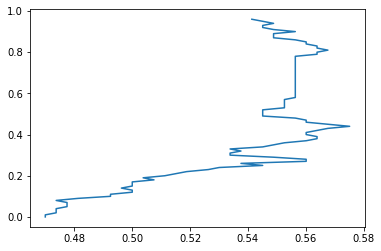

In [28]:
plt.plot(df_threshold.Accuracy,df_threshold.Threshold)
plt.title()
plt.xlabel("Accuracy", fontsize=13)
plt.ylabel("Threshold", fontsize=13)
plt.legend()
plt.show()

In [39]:
nums = [2,7,11,15]
target = 9
twoSum(nums, target)

7
2
-2
-6
{2: 0, 7: 1, 11: 2, 15: 3}


In [38]:
def twoSum(nums, target):
        d = {}
        for i, j in enumerate(nums):
            r = target - j
            print(r)
            #if r in d: return [d[r], i]
            d[j] = i
        print (d)